In [17]:
from typing import List, Callable

import numpy as np
from scipy.stats import ks_2samp, cramervonmises_2samp

import matplotlib.pyplot as plt

In [9]:
def get_projections(
    basis: np.ndarray,
    inner_product: Callable[[np.ndarray], np.ndarray],
) -> np.ndarray:
    """
    Computes orthogonal projection of a dataset onto a plane with orthonormal basis `basis`.
    The dataset is represented abstractly by the Callable `inner_product`, which is a function
    that takes in a vector `v` and returns the array of inner products <x, v> for all x in the
    dataset.

    Parameters
    ----------
    basis: np.ndarray
        Should be k x d, all length 1, and orthogonal
    inner_product: Callable[np.ndarray, np.ndarray]

    Returns
    -------
    projections: np.ndarray
        N x k
    """
    # check that basis is orthonormal
    dots = np.einsum("ik,jk->ij", basis, basis)
    np.testing.assert_almost_equal(dots, np.identity(dots.shape[0]))

    res = []
    for x in basis:
        res.append(inner_product(x))
    res = np.array(res)
    return res.T

In [10]:
def get_inner_product_function(dataset: np.ndarray):
    return lambda x: np.dot(dataset, x)

In [37]:
def generate_mixture(
    centroids: List[np.ndarray],
    samples_per_centroid: int = 50,
):
    res = []
    for c in centroids:
        res.append(np.random.normal(loc=c, size=(samples_per_centroid, c.shape[0])))
    return np.concatenate(res)

In [38]:
centroids = np.array([[10, 0], [0, 10], [10, 10]])
out = generate_mixture(centroids)

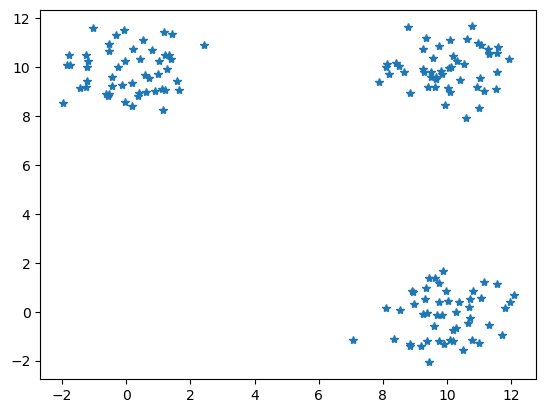

In [39]:
plt.plot(out[:,0], out[:,1], "*")

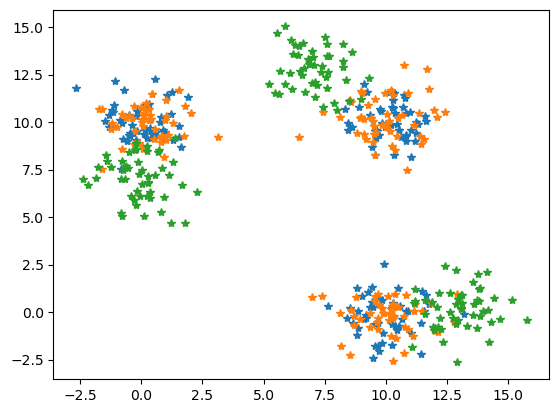

In [40]:
base_dataset = generate_mixture(np.array([[10, 0], [0, 10], [10, 10]]))
control_dataset = generate_mixture(np.array([[10, 0], [0, 10], [10, 10]]))
query_dataset = generate_mixture(np.array([[13, 0], [0, 7], [7, 13]]))

plt.plot(base_dataset[:,0], base_dataset[:,1], "*")
plt.plot(control_dataset[:,0], control_dataset[:,1], "*")
plt.plot(query_dataset[:,0], query_dataset[:,1], "*")

In [41]:
vector = np.random.normal(size=(1, 2))
vector = vector / np.linalg.norm(vector)

In [42]:
base_ip = get_inner_product_function(base_dataset)
control_ip = get_inner_product_function(control_dataset)
query_ip = get_inner_product_function(query_dataset)

base_proj = get_projections(vector, base_ip)
control_proj = get_projections(vector, control_ip)
query_proj = get_projections(vector, query_ip)

In [43]:
ks_2samp(base_proj, control_proj)

KstestResult(statistic=array([0.07333333]), pvalue=array([0.8164827]), statistic_location=array([-13.25149024]), statistic_sign=array([1.]))

In [44]:
ks_2samp(base_proj, query_proj)

KstestResult(statistic=array([0.24]), pvalue=array([0.00033473]), statistic_location=array([-10.28268423]), statistic_sign=array([-1.]))

In [45]:
cramervonmises_2samp(base_proj, control_proj)

CramerVonMisesResult(statistic=[0.06922222], pvalue=[0.76079038])

In [46]:
cramervonmises_2samp(base_proj, query_proj)

CramerVonMisesResult(statistic=[1.041], pvalue=[0.00196306])